<a href="https://colab.research.google.com/github/roshank1605A04/Spam-Detection/blob/master/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# reading the data

data = pd.read_csv('drive/My Drive/Projects/practice/Spam Detection/spam.csv', encoding = 'latin-1')

# getting the shape
data.shape

(5572, 5)

In [0]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
# deleting the unnamed columns 

data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

# getting the shape of new data
data.shape

(5572, 2)

In [0]:
# renaming v1 and v2

data = data.rename(columns = {'v1': 'labels', 'v2': 'message'})

# getting the colums of the data
data.columns

Index(['labels', 'message'], dtype='object')

In [0]:
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [0]:
# adding a column to represent the length of the tweet

data['len'] = data['message'].str.len()
data['len'] = data['message'].str.len()

data.head(10)

,labels,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


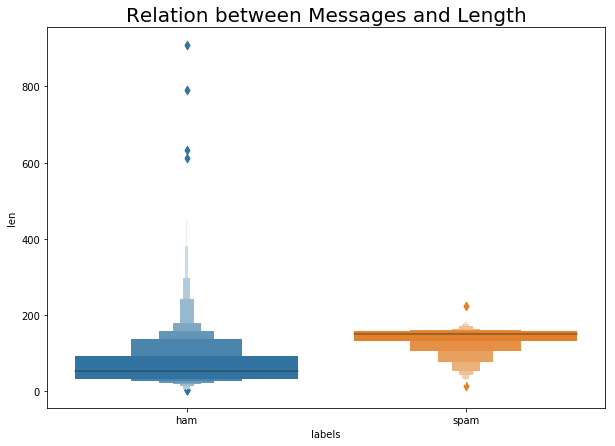

In [0]:
# relation between spam messages and length

plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x = data['labels'], y = data['len'])
plt.title('Relation between Messages and Length', fontsize = 20)
plt.show()

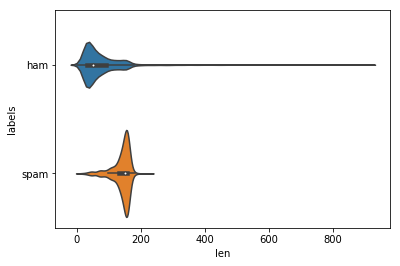

In [0]:
# distribution of length

sns.violinplot(data['len'], data['labels'])

In [0]:
# describing by labels

data.groupby('labels').describe()

len                                                         
         count        mean        std   min    25%    50%    75%    max
labels                                                                 
ham     4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam     747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [0]:
# checking the values in the labels attribute

data['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

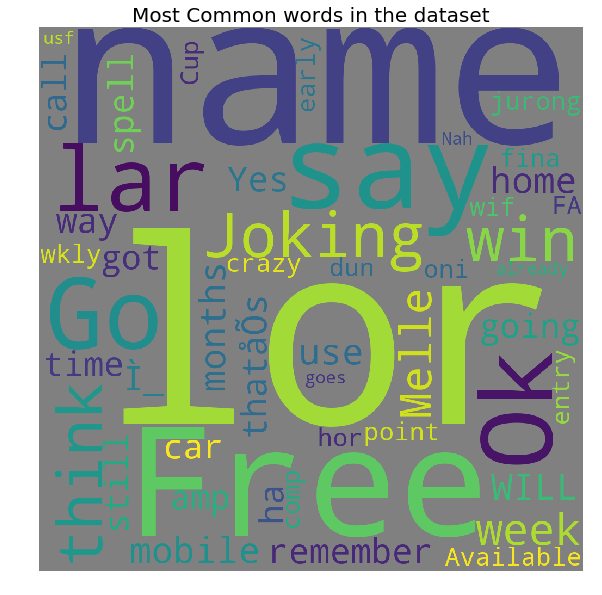

In [0]:
# checking the most common words in the whole dataset

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'gray', width = 1000, height = 1000, max_words = 50).generate(str(data['message']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Most Common words in the dataset', fontsize = 20)
plt.axis('off')
plt.imshow(wordcloud)


In [0]:
# let's encode the label attributes

data['labels'].replace('spam', 0, inplace = True)
data['labels'].replace('ham', 1, inplace = True)

# checking the values of the labels now
data['labels'].value_counts()


1    4825
0     747
Name: labels, dtype: int64

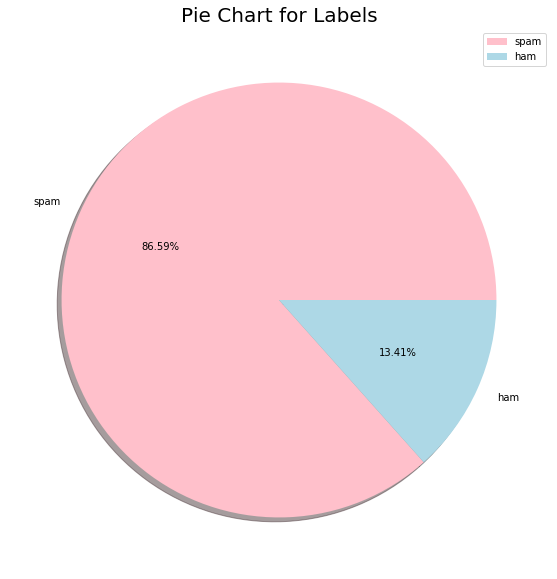

In [0]:
# visualize it in pie chart

size = [4825, 747]
labels = ['spam', 'ham']
colors = ['pink', 'lightblue']

plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart for Labels', fontsize = 20)
plt.legend()
plt.show()

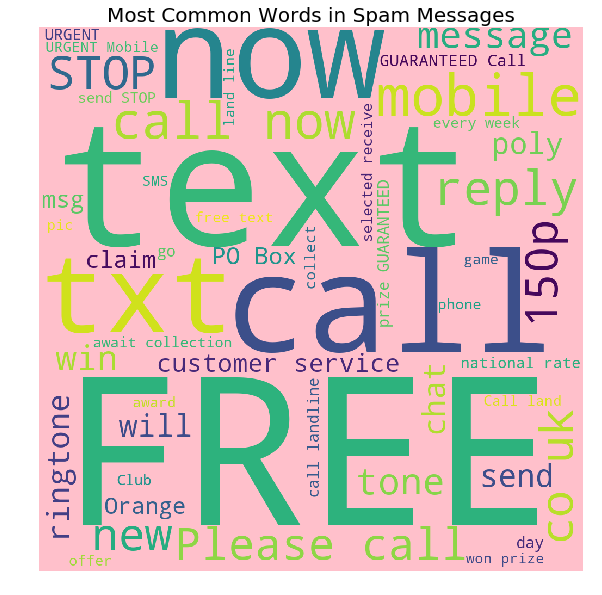

In [0]:
# checking the most common words in spam messages

spam = ' '.join(text for text in data['message'][data['labels'] == 0])

wordcloud = WordCloud(background_color = 'pink', max_words = 50, height = 1000, width = 1000).generate(spam)

plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.title('Most Common Words in Spam Messages', fontsize = 20)
plt.imshow(wordcloud)

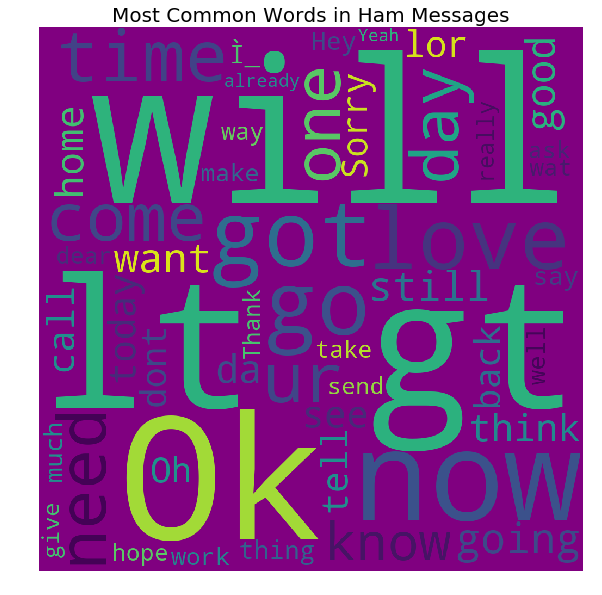

In [0]:
# checking the most common words in ham messages

ham = ' '.join(text for text in data['message'][data['labels'] == 1])

wordcloud = WordCloud(background_color = 'purple', max_words = 50, height = 1000, width = 1000).generate(ham)

plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.title('Most Common Words in Ham Messages', fontsize = 20)
plt.imshow(wordcloud)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

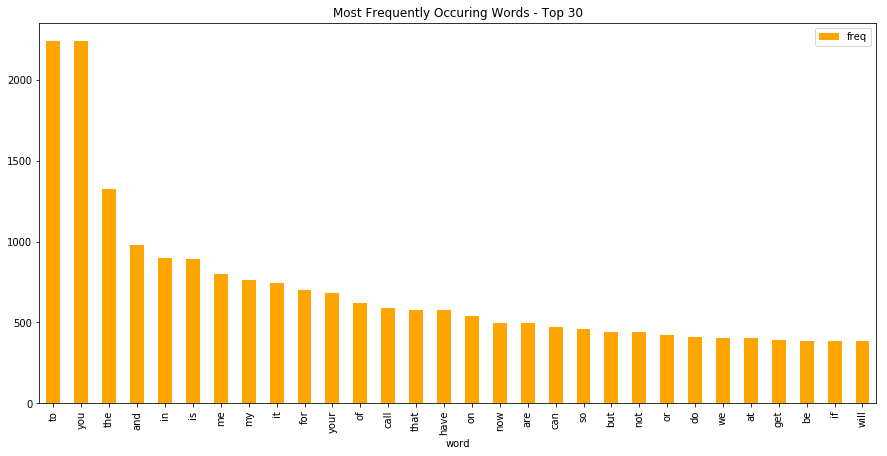

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
words = cv.fit_transform(data.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'orange')
plt.title("Most Frequently Occuring Words - Top 30")

In [0]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
import re

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['message'][data['labels'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['message'][data['labels'] == 0])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# let's check no. of hastags
print("No. of Positive Hashtags :", HT_regular)
print("no. of negative Hastags :", HT_negative)
      

No. of Positive Hashtags : []
no. of negative Hastags : ['5000', '150', '5000', '5000']


In [0]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
corpus = []

for i in range(0, 5572):
  review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  corpus.append(review)

In [0]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0]

print(x.shape)
print(y.shape)


(5572, 6221)
(5572,)


In [0]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 6221)
(1393, 6221)
(4179,)
(1393,)


In [0]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9990428332136875
Testing Accuracy : 0.9698492462311558
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       191
           1       0.97      1.00      0.98      1202

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.97      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



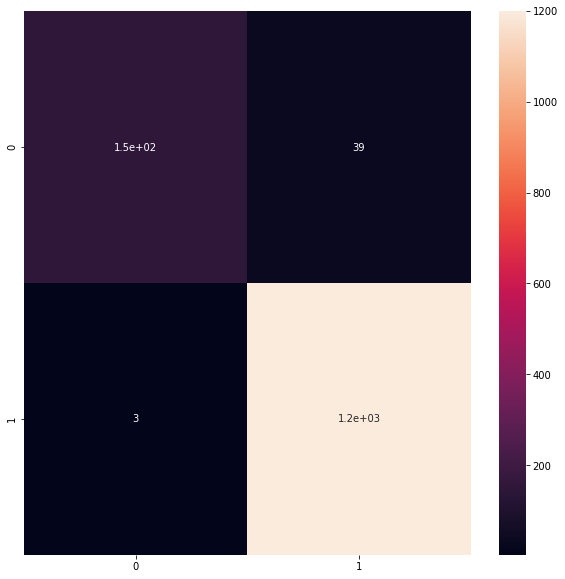

In [0]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)


Training Accuracy : 0.9825317061497966
Testing Accuracy : 0.9712849964106246
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       191
           1       0.97      0.99      0.98      1202

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.97      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



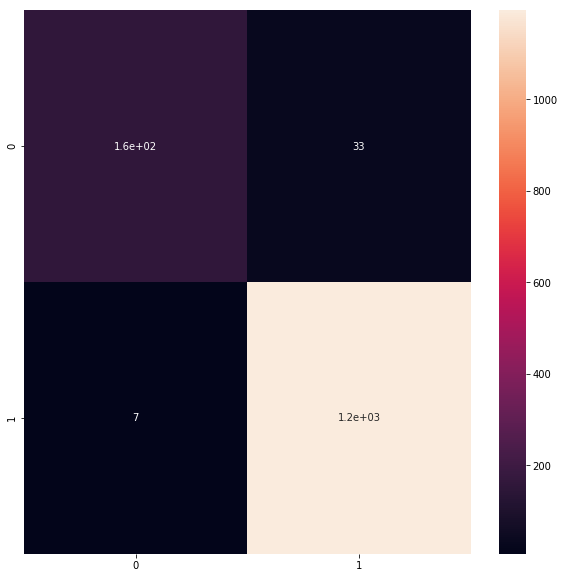

In [0]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)


Training Accuracy : 1.0
Testing Accuracy : 0.968413496051687
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       191
           1       0.97      0.99      0.98      1202

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.96      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



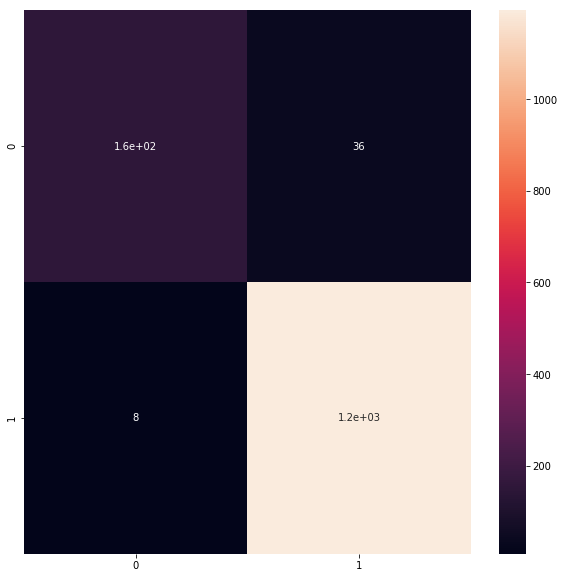

In [0]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
